# Preprocessing Tutorial  
This tutorial focuses on how to utilize dynamo to preprocess data. In the new version, we make `Preprocessor` class to allow you to freely explore different preprocessing recipes whose step parameters that can be configured inside `Preprocessor`. Existing recipes in preprocessor includes monocle, pearson residual, seurat and sctransform. Moreover, you can replace each preprocessing step with your own implementation with ease. For instance, `Preprocessor`'s monocle pipeline contains `filter_cells_by_outliers`, `filter_genes_by_outliers`, `normalize_by_cells`, `select_genes` and others. You can replace the implementation and default monocle parameters passed in to these functions by replacing or changing attributes of `Preprocessor`.

In older versions, dynamo offer several recipes, among which `recipe_monocle` is  a basic function as a building blocks of other recipes. `Preprocessor` provides users with `config_monocle_recipe` and other `config*` to help you reproduce results in dynamo related papers.

## Using Predefined Recipe Configurations in Preprocessor

In [3]:
import dynamo as dyn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from dynamo.configuration import DKM
import warnings
warnings.filterwarnings('ignore')


Read zebrafish data

In [4]:
adata = dyn.sample_data.zebrafish()
celltype_key = "Cell_type"
figsize = (10, 10)

|-----> Downloading data to ./data/zebrafish.h5ad


Import `Preprocessor` class

In [5]:
from dynamo.preprocessing import Preprocessor

### Monocle Recipe 
To use monocle recipe, we simply call `preprocessor.config_monocle_recipe` to set corresponding methods and function parameters for monocle related preprocessing functions. The default constructor parameters of `Preprocessor` for preprocessing are from our monocle recipe.

In [4]:
preprocessor = Preprocessor()
preprocessor.config_monocle_recipe(adata)
preprocessor.preprocess_adata_monocle(adata)

default_preprocessor_monocle_adata = adata # save for usage later

|-----------> <insert> {} to uns['pp'] in AnnData Object.
|-----> Running preprocessing pipeline...
|-----------> <insert> {} to uns['pp'] in AnnData Object.
|-----------> <insert> tkey=None to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type=None to uns['pp'] in AnnData Object.
|-----> making adata observation index unique...
|-----> applying collapse species adata...
|-----> applying convert_gene_name function...
|-----> filtering outlier cells...
|-----> cell filter kwargs:{'filter_bool': None, 'layer': 'all', 'min_expr_genes_s': 50, 'min_expr_genes_u': 25, 'min_expr_genes_p': 2, 'max_expr_genes_s': inf, 'max_expr_genes_u': inf, 'max_expr_genes_p': inf, 'shared_count': None}
|-----------> filtering cells by layer:X
|-----------> filtering cells by layer:spliced
|-----------> filtering cells by layer:unspliced
|-----> skip filtering by layer:protein as it is not in adata.
|-----> <insert> pass_basic_filter to obs in AnnData Object.
|-----------> inplace subsetting 

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [229.0060s]


<Figure size 1000x1000 with 0 Axes>

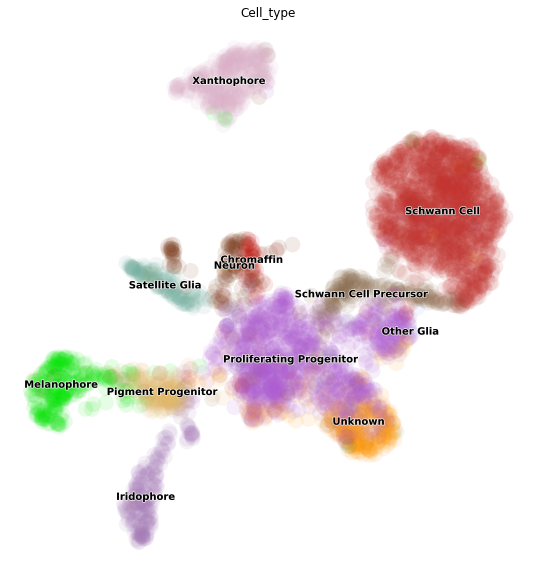

In [5]:
dyn.tl.reduceDimension(adata, basis="pca")
dyn.pl.umap(adata, color=celltype_key, figsize=figsize)

### Pearson Residual Recipe

In [6]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
preprocessor.config_pearson_residuals_recipe(adata)
preprocessor.preprocess_adata_pearson_residuals(adata)

|-----> Downloading data to ./data/zebrafish.h5ad
|-----------> <insert> {} to uns['pp'] in AnnData Object.
|-----> gene selection on layer: X
|-----> extracting highly variable genes
|-----> applying Pearson residuals to layer <X>
|-----> replacing layer <X> with pearson residual normalized data.
|-----> [pearson residual normalization] in progress: 100.0000%
|-----> [pearson residual normalization] finished [1.3350s]
|-----> [preprocess by pearson residual recipe] in progress: 100.0000%
|-----> [preprocess by pearson residual recipe] finished [4.8731s]


|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [14.8080s]


<Figure size 1000x1000 with 0 Axes>

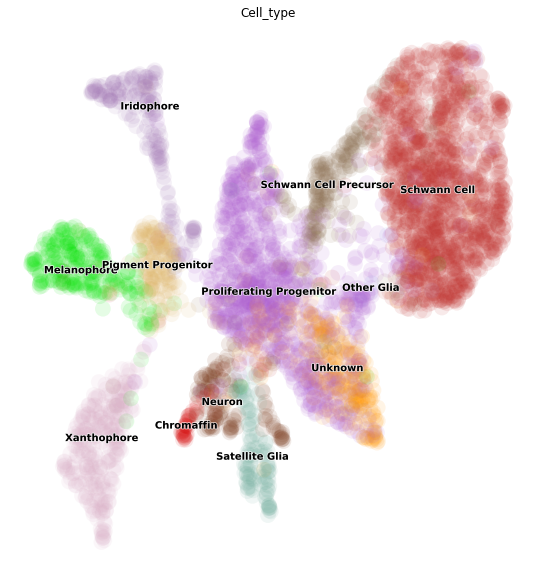

In [7]:
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color=celltype_key, figsize=figsize)

### Sctransform Recipe

In [5]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
preprocessor.config_sctransform_recipe()
preprocessor.preprocess_adata_sctransform(adata)

### Seurat Recipe

In [8]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
preprocessor.config_seurat_recipe()
preprocessor.preprocess_adata_seurat(adata)

|-----> Downloading data to ./data/zebrafish.h5ad
|-----> Applying Seurat recipe preprocessing...
|-----------> <insert> {} to uns['pp'] in AnnData Object.
|-----> rounding expression data of layer: X during size factor calculation
|-----> rounding expression data of layer: unspliced during size factor calculation
|-----> rounding expression data of layer: spliced during size factor calculation
|-----> size factor normalize following layers: ['X', 'spliced', 'unspliced']
|-----> skipping log transformation as input requires...
|-----> applying None to layer<X>
|-----> set adata <X> to normalized data.
|-----> <insert> pp.norm_method to uns in AnnData Object.
|-----> skipping log transformation as input requires...
|-----> applying None to layer<spliced>
|-----> <insert> X_spliced to obsm in AnnData Object.
|-----> <insert> pp.norm_method to uns in AnnData Object.
|-----> skipping log transformation as input requires...
|-----> applying None to layer<unspliced>
|-----> <insert> X_unspli

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [15.1820s]


<Figure size 1000x1000 with 0 Axes>

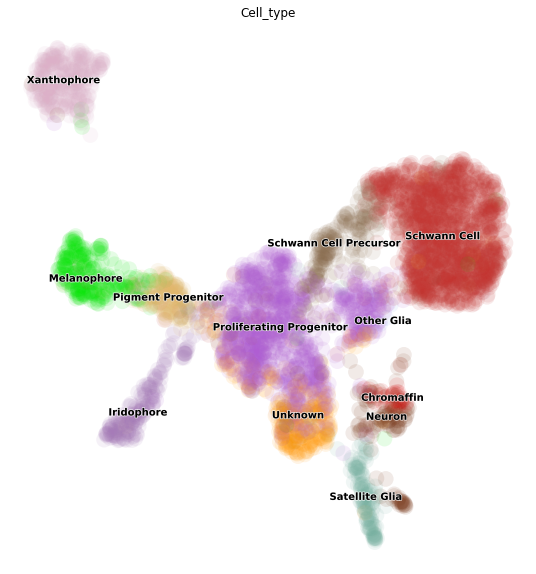

In [9]:
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color=celltype_key, figsize=figsize)

## Change Function Parameters Configured in Preprocessor

Here we are gong to use recipe monocle as an example. In recipe monocle's selection genes function, we can set recipe to be `dynamo_monocle`, `seurat`, `svr` and others to apply different criterions to select genes. We can set preprocesor's `select_genes_kwargs` to pass wanted parameters. In the example below, the default parameter is `recipe=dynmoa_monocle`. We can change it to `seurat` and add other contraint parameters as well.

In [6]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
preprocessor.config_monocle_recipe(adata)
print(preprocessor.select_genes_kwargs)

|-----> Downloading data to ./data/zebrafish.h5ad
|-----------> <insert> {} to uns['pp'] in AnnData Object.
{'recipe': 'dynamo_monocle', 'dynamo_monocle_kwargs': {'sort_by': 'SVR', 'n_top_genes': 2000, 'keep_filtered': True, 'SVRs_kwargs': {'min_expr_cells': 0, 'min_expr_avg': 0, 'max_expr_avg': inf, 'svr_gamma': None, 'winsorize': False, 'winsor_perc': (1, 99.5), 'sort_inverse': False}, 'only_bools': True}}


In [7]:

preprocessor.select_genes_kwargs = dict(
    recipe="seurat",
    seurat_min_disp=None,
    seurat_max_disp=None,
    seurat_min_mean=0.4,
    seurat_max_mean=0.6,
)
print(preprocessor.select_genes_kwargs)
preprocessor.preprocess_adata_monocle(adata);
dyn.tl.reduceDimension(adata, basis="pca")
dyn.pl.umap(adata, color=celltype_key, figsize=figsize)

{'recipe': 'seurat', 'seurat_min_disp': None, 'seurat_max_disp': None, 'seurat_min_mean': 0.4, 'seurat_max_mean': 0.6}
|-----> Running preprocessing pipeline...
|-----------> <insert> {} to uns['pp'] in AnnData Object.
|-----------> <insert> tkey=None to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type=None to uns['pp'] in AnnData Object.
|-----> making adata observation index unique...
|-----> applying collapse species adata...
|-----> applying convert_gene_name function...
|-----> filtering outlier cells...
|-----> cell filter kwargs:{'filter_bool': None, 'layer': 'all', 'min_expr_genes_s': 50, 'min_expr_genes_u': 25, 'min_expr_genes_p': 2, 'max_expr_genes_s': inf, 'max_expr_genes_u': inf, 'max_expr_genes_p': inf, 'shared_count': None}
|-----------> filtering cells by layer:X
|-----------> filtering cells by layer:spliced
|-----------> filtering cells by layer:unspliced
|-----> skip filtering by layer:protein as it is not in adata.
|-----> <insert> pass_basic_filte

## Define Your Own Preprocess and Integrate with Preprocessor